In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.16.1
3.3.3


In [3]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [4]:
from tensorflow.keras.models import load_model
model = load_model("model/model_11.keras")

In [5]:
frame = cv2.imread("picture/happy.jpg")

In [6]:
frame.shape

(600, 1200, 3)

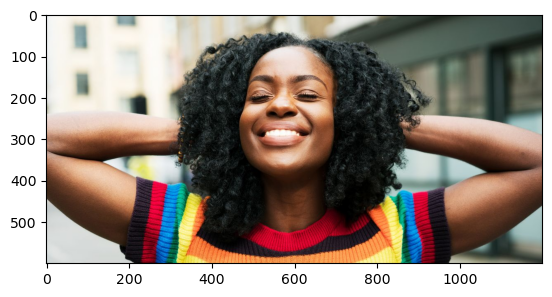

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [10]:
gray.shape

(600, 1200)

In [11]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in faces:
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = frame[y:y + h, x:x + w]
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey + eh, ex:ex + ew]
            

Face not detected


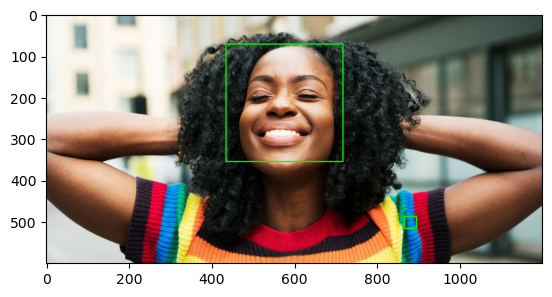

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
final_image = cv2.resize(face_roi, (48, 48))  
final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
final_image = np.expand_dims(final_image, axis=-1)
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0

In [14]:
Predictions = model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


In [15]:
Predictions[0]

array([2.7111802e-05, 3.8756557e-08, 1.2820658e-04, 9.9891305e-01,
       1.8152624e-06, 3.8352751e-04, 5.4624939e-04], dtype=float32)

In [16]:
emotion_labels[np.argmax(Predictions)]

'Happy'